fairindex measure

In [ ]:
## method 1: DD

## method 2: median

##state-level
#new measure of fairindex based on distribution difference

#median-based fairindex

dict_state={'1': 'AL', '2': 'AK', '4': 'AZ', '5': 'AR', '6': 'CA', '8': 'CO', '9': 'CT', '10': 'DE', '11': 'DC', '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID',
            '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO',
            '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', 
            '44': 'RI', '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI', '56': 'WY', '60': 'AS', 
            '66': 'GU', '69': 'MP', '72': 'PR', '74': 'UM', '78': 'VI'}

col=['census_block_group','ParentType','num_accessible_facility','demand_ratios','demand_met_in_local','age']

listParentType=['Health Care Services',
                 'Pharmaceutical and Medical Supply Stores',
                 'Grocery and Food Supply',
                 'Social Assistance',
                 'Transportation Services',
                 'Home Health Care Services',
                 'Financial Services',
                 'Legal Services',
                 'Housing and Real Estate',
                 'Personal Care Services',
                 'Utility Services',
                 'Retail Stores for Basic Needs']

homoFairList=[]
heteFairList=[]

homoDistDiffFairList=[]
heteDistDiffFairList=[]

for key in listParentType: 
    
    homoPath='D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/homo_supply_demand/'+key+'.csv'
    hetePath='D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/hete_supply_demand/'+key+'.csv'
    dfHomo=pd.read_csv(homoPath,usecols=col)
    dfHete=pd.read_csv(hetePath,usecols=col)
    
    dfHomo['census_block_group']=dfHomo['census_block_group'].astype(str)
    dfHomo['statefip']=dfHomo.apply(lambda x: x['census_block_group'][0:2] if len(x['census_block_group'])==12 
                                     else x['census_block_group'][0:1],axis=1)
    dfHomo['census_block_group']=dfHomo['census_block_group'].astype('int64')
    
    dfHete['census_block_group']=dfHete['census_block_group'].astype(str)
    dfHete['statefip']=dfHete.apply(lambda x: x['census_block_group'][0:2] if len(x['census_block_group'])==12 
                                     else x['census_block_group'][0:1],axis=1)
    dfHete['census_block_group']=dfHete['census_block_group'].astype('int64')
    
    
    print('read data_'+key)
    
    for fip in dict_state.keys():
        state=dict_state[fip]
        #print(state)
    #homo
        df_st=dfHomo[dfHomo['statefip']==fip]
        
        threAccRatio=np.median(df_st[(df_st['age']!='greater than 0.5')&
                                    (df_st['demand_met_in_local']<=1)]['demand_met_in_local'])
        if len(df_st)>0:
            #print('homo')
            numGoodOldCBG=len(df_st[(df_st['demand_met_in_local']>=threAccRatio)&(df_st['age']=='greater than 0.5')&
                                    (df_st['demand_met_in_local']<=1)])
            numOldCBG=len(df_st[(df_st['age']=='greater than 0.5')&(df_st['demand_met_in_local']<=1)])
            if numOldCBG>0:
                FairIndex=(numGoodOldCBG/numOldCBG-0.5)*2
                homoFairList.append((key,state,FairIndex,numGoodOldCBG,numOldCBG,'5 miles'))

        #distribution-diff fairindex
        if len(df_st)>0:
            numold=len(df_st[(df_st['age']=='greater than 0.5')&(df_st['demand_met_in_local']<=1)])
            if numold>0:     
                sumfair=0
                for i in range(9):
                    thres=np.percentile(df_st[(df_st['age']!='greater than 0.5')&
                                            (df_st['demand_met_in_local']<=1)]['demand_met_in_local'],i*10+10)
                    numGood=len(df_st[(df_st['demand_met_in_local']>=thres)&(df_st['age']=='greater than 0.5')&
                                        (df_st['demand_met_in_local']<=1)])     
                    fairindex=numGood/numold-(1-(i*10+10)/100)
                    sumfair += fairindex
                
                FairIndex=sumfair/4.5
                homoDistDiffFairList.append((key,state,FairIndex,'5 miles'))
        
        
    #hete
        df_st=dfHete[dfHete['statefip']==fip]
        threAccRatio=np.median(df_st[(df_st['age']!='greater than 0.5')&
                                    (df_st['demand_met_in_local']<=1)]['demand_met_in_local'])
        if len(df_st)>0:
            #print('hete')
            numGoodOldCBG=len(df_st[(df_st['demand_met_in_local']>=threAccRatio)&(df_st['age']=='greater than 0.5')&(df_st['demand_met_in_local']<=1)])
            numOldCBG=len(df_st[(df_st['age']=='greater than 0.5')&(df_st['demand_met_in_local']<=1)])
            if numOldCBG>0:
                FairIndex=(numGoodOldCBG/numOldCBG-0.5)*2
                heteFairList.append((key,state,FairIndex,numGoodOldCBG,numOldCBG,'10 miles'))    
        
        #distribution-diff fairindex
        if len(df_st)>0:
            numold=len(df_st[(df_st['age']=='greater than 0.5')&(df_st['demand_met_in_local']<=1)])
            if numold>0:     
                sumfair=0
                for i in range(9):
                    thres=np.percentile(df_st[(df_st['age']!='greater than 0.5')&
                                            (df_st['demand_met_in_local']<=1)]['demand_met_in_local'],i*10+10)
                    numGood=len(df_st[(df_st['demand_met_in_local']>=thres)&(df_st['age']=='greater than 0.5')&
                                        (df_st['demand_met_in_local']<=1)])     
                    fairindex=numGood/numold-(1-(i*10+10)/100)
                    sumfair += fairindex
                
                FairIndex=sumfair/4.5
                heteDistDiffFairList.append((key,state,FairIndex,'10 miles'))

            
    print('done'+key)    
    
    

            
homoMedianFairDF=pd.DataFrame(homoFairList,columns=['parentType','state','FairIndex','numGoodOldCBG','numOldCBG','coverage'])
heteMedianFairDF=pd.DataFrame(heteFairList,columns=['parentType','state','FairIndex','numGoodOldCBG','numOldCBG','coverage'])
    
homoDistDiffFairDF=pd.DataFrame(homoDistDiffFairList,columns=['parentType','state','FairIndex','coverage'])
heteDistDiffFairDF=pd.DataFrame(heteDistDiffFairList,columns=['parentType','state','FairIndex','coverage'])

In [86]:
#country level

#new measure of fairindex based on distribution difference

#median-based fairindex



col=['census_block_group','ParentType','num_accessible_facility','demand_ratios','demand_met_in_local','age']

listParentType=['Health Care Services',
                 'Pharmaceutical and Medical Supply Stores',
                 'Grocery and Food Supply',
                 'Social Assistance',
                 'Transportation Services',
                 'Home Health Care Services',
                 'Financial Services',
                 'Legal Services',
                 'Housing and Real Estate',
                 'Personal Care Services',
                 'Utility Services',
                 'Retail Stores for Basic Needs']

homoFairList=[]
heteFairList=[]

homoDistDiffFairList=[]
heteDistDiffFairList=[]

for key in listParentType: 
    
    homoPath='D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/homo_supply_demand/'+key+'.csv'
    hetePath='D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/hete_supply_demand/'+key+'.csv'
    dfHomo=pd.read_csv(homoPath,usecols=col)
    dfHete=pd.read_csv(hetePath,usecols=col)
    
    dfHomo['census_block_group']=dfHomo['census_block_group'].astype(str)
    dfHomo['statefip']=dfHomo.apply(lambda x: x['census_block_group'][0:2] if len(x['census_block_group'])==12 
                                     else x['census_block_group'][0:1],axis=1)
    dfHomo['census_block_group']=dfHomo['census_block_group'].astype('int64')
    
    dfHete['census_block_group']=dfHete['census_block_group'].astype(str)
    dfHete['statefip']=dfHete.apply(lambda x: x['census_block_group'][0:2] if len(x['census_block_group'])==12 
                                     else x['census_block_group'][0:1],axis=1)
    dfHete['census_block_group']=dfHete['census_block_group'].astype('int64')
    
    
    print('read data_'+key)
    
   
       
#homo
    df_st=dfHomo

    threAccRatio=np.median(df_st[(df_st['age']!='greater than 0.5')&
                                (df_st['demand_met_in_local']<=1)]['demand_met_in_local'])
    if len(df_st)>0:
        #print('homo')
        numGoodOldCBG=len(df_st[(df_st['demand_met_in_local']>=threAccRatio)&(df_st['age']=='greater than 0.5')&
                                (df_st['demand_met_in_local']<=1)])
        numOldCBG=len(df_st[(df_st['age']=='greater than 0.5')&(df_st['demand_met_in_local']<=1)])
        if numOldCBG>0:
            FairIndex=(numGoodOldCBG/numOldCBG-0.5)*2
            homoFairList.append((key,FairIndex,numGoodOldCBG,numOldCBG,'5 miles'))

    #distribution-diff fairindex
    if len(df_st)>0:
        numold=len(df_st[(df_st['age']=='greater than 0.5')&(df_st['demand_met_in_local']<=1)])
        if numold>0:     
            sumfair=0
            for i in range(9):
                thres=np.percentile(df_st[(df_st['age']!='greater than 0.5')&
                                        (df_st['demand_met_in_local']<=1)]['demand_met_in_local'],i*10+10)
                numGood=len(df_st[(df_st['demand_met_in_local']>=thres)&(df_st['age']=='greater than 0.5')&
                                    (df_st['demand_met_in_local']<=1)])     
                fairindex=numGood/numold-(1-(i*10+10)/100)
                sumfair += fairindex

            FairIndex=sumfair/4.5
            homoDistDiffFairList.append((key,FairIndex,'5 miles'))


#hete
    df_st=dfHete
    threAccRatio=np.median(df_st[(df_st['age']!='greater than 0.5')&
                                (df_st['demand_met_in_local']<=1)]['demand_met_in_local'])
    if len(df_st)>0:
        #print('hete')
        numGoodOldCBG=len(df_st[(df_st['demand_met_in_local']>=threAccRatio)&(df_st['age']=='greater than 0.5')&(df_st['demand_met_in_local']<=1)])
        numOldCBG=len(df_st[(df_st['age']=='greater than 0.5')&(df_st['demand_met_in_local']<=1)])
        if numOldCBG>0:
            FairIndex=(numGoodOldCBG/numOldCBG-0.5)*2
            heteFairList.append((key,FairIndex,numGoodOldCBG,numOldCBG,'10 miles'))    

    #distribution-diff fairindex
    if len(df_st)>0:
        numold=len(df_st[(df_st['age']=='greater than 0.5')&(df_st['demand_met_in_local']<=1)])
        if numold>0:     
            sumfair=0
            for i in range(9):
                thres=np.percentile(df_st[(df_st['age']!='greater than 0.5')&
                                        (df_st['demand_met_in_local']<=1)]['demand_met_in_local'],i*10+10)
                numGood=len(df_st[(df_st['demand_met_in_local']>=thres)&(df_st['age']=='greater than 0.5')&
                                    (df_st['demand_met_in_local']<=1)])     
                fairindex=numGood/numold-(1-(i*10+10)/100)
                sumfair += fairindex

            FairIndex=sumfair/4.5
            heteDistDiffFairList.append((key,FairIndex,'10 miles'))

            
    print('done'+key)    
    
    

            
homoMedFairDF_US=pd.DataFrame(homoFairList,columns=['parentType','FairIndex','numGoodOldCBG','numOldCBG','coverage'])
heteMedFairDF_US=pd.DataFrame(heteFairList,columns=['parentType','FairIndex','numGoodOldCBG','numOldCBG','coverage'])
    
homoDDFairDF_US=pd.DataFrame(homoDistDiffFairList,columns=['parentType','FairIndex','coverage'])
heteDDFairDF_US=pd.DataFrame(heteDistDiffFairList,columns=['parentType','FairIndex','coverage'])

read data_Health Care Services
doneHealth Care Services
read data_Pharmaceutical and Medical Supply Stores
donePharmaceutical and Medical Supply Stores
read data_Grocery and Food Supply
doneGrocery and Food Supply
read data_Social Assistance
doneSocial Assistance
read data_Transportation Services
doneTransportation Services
read data_Home Health Care Services
doneHome Health Care Services
read data_Financial Services
doneFinancial Services
read data_Legal Services
doneLegal Services
read data_Housing and Real Estate
doneHousing and Real Estate
read data_Personal Care Services
donePersonal Care Services
read data_Utility Services
doneUtility Services
read data_Retail Stores for Basic Needs
doneRetail Stores for Basic Needs


In [91]:
heteDDFairDF_US.to_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/FairIndex/heteDistDiffFairIndex_US.csv')

In [90]:
homoDDFairDF_US.to_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/FairIndex/homoDistDiffFairIndex_US.csv')

In [ ]:
homoMedianFairDF.to_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/FairIndex/homoMedianFairIndex.csv')
heteMedianFairDF.to_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/FairIndex/heteMedianFairIndex.csv')

homoDistDiffFairDF.to_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/FairIndex/homoDistDiffFairIndex.csv')
heteDistDiffFairDF.to_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/FairIndex/heteDistDiffFairIndex.csv')



fairindex analysis

In [3]:
homoMedianFairDF=pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/FairIndex/homoMedianFairIndex.csv')
homoDistDiffFairDF=pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/FairIndex/homoDistDiffFairIndex.csv')

homoMedianFairDF=homoMedianFairDF.drop('Unnamed: 0',axis=1)
homoDistDiffFairDF=homoDistDiffFairDF.drop('Unnamed: 0',axis=1)
homoMedianFairDF['fairtype']='Median'
homoDistDiffFairDF['fairtype']='DistDiff'
dfMed=homoMedianFairDF[['parentType','state','FairIndex','coverage','fairtype']]
dfDD=pd.concat([dfMed,homoDistDiffFairDF])
dfDD['numOldCBG']=dfDD.apply(lambda x: homoMedianFairDF[(homoMedianFairDF['state']==x['state'])&
                                                        (homoMedianFairDF['parentType']==x['parentType'])]
                             ['numOldCBG'].iat[0],axis=1)



In [4]:
dfDD

,parentType,state,FairIndex,coverage,fairtype,numOldCBG
0,Health Care Services,AL,0.200000,5 miles,Median,10
1,Health Care Services,AZ,0.087591,5 miles,Median,274
2,Health Care Services,AR,-0.076923,5 miles,Median,13
3,Health Care Services,CA,-0.088372,5 miles,Median,215
4,Health Care Services,CO,0.111111,5 miles,Median,18
...,...,...,...,...,...,...
451,Retail Stores for Basic Needs,VA,0.020833,5 miles,DistDiff,32
452,Retail Stores for Basic Needs,WA,0.190476,5 miles,DistDiff,28
453,Retail Stores for Basic Needs,WV,0.777778,5 miles,DistDiff,3
454,Retail Stores for Basic Needs,WI,0.288889,5 miles,DistDiff,10


In [20]:
mainType=['Health Care Services',
                'Grocery and Food Supply',
                 'Housing and Real Estate']
for key in mainType:
    for state in ['FL','AZ','CA']:
        ff=dfDD[(dfDD['state']==state)&(dfDD['fairtype']=='DistDiff')&(dfDD['parentType']==key)]['FairIndex'].iat[0]
        print(state,key,ff)

FL Health Care Services 0.1312181746964356
AZ Health Care Services 0.0754257907542579
CA Health Care Services -0.0718346253229974
FL Grocery and Food Supply 0.1220400728597449
AZ Grocery and Food Supply -0.0383986928104575
CA Grocery and Food Supply -0.1412253374870197
FL Housing and Real Estate 0.1433021806853583
AZ Housing and Real Estate 0.0819140308191403
CA Housing and Real Estate 0.0147133434804667


In [24]:
import numpy as np
mainPType=['Health Care Services',
                'Grocery and Food Supply',
                 'Housing and Real Estate']

dfD=dfDD[(dfDD['numOldCBG']>=30)&(dfDD['parentType'].isin(mainPType))]
for key in mainPType:
    md=np.median(dfD[(dfD['fairtype']=='DistDiff')&(dfD['parentType']==key)]['FairIndex'])
    print(key,md)

Health Care Services 0.11510040160642565
Grocery and Food Supply -0.0383986928104575
Housing and Real Estate 0.0819140308191403


In [5]:
from scipy.stats import ttest_ind, shapiro
ftype='Median'
g2=dfDD[(dfDD['numOldCBG']>=30)&(dfDD['parentType']=='Grocery and Food Supply')&(dfDD['fairtype']==ftype)]['FairIndex']
g3=dfDD[(dfDD['numOldCBG']>=30)&(dfDD['parentType']=='Housing and Real Estate')&(dfDD['fairtype']==ftype)]['FairIndex']
g1=dfDD[(dfDD['numOldCBG']>=30)&(dfDD['parentType']=='Health Care Services')&(dfDD['fairtype']==ftype)]['FairIndex']
t_st,p_va=ttest_ind(g1,g2,equal_var=False)
#print(t_st,p_va)

def sig(p):
    if p<0.001:
        return '***'
    elif p<0.01:
        return '**'
    elif p<0.05:
        return '*'
    else:
        return 'not significant'

med_dict_pvalue={('HCS','GFS'):sig(ttest_ind(g1,g2,equal_var=False)[1]),
             ('HCS','HRE'):sig(ttest_ind(g1,g3,equal_var=False)[1]),
             ('GFS','HRE'):sig(ttest_ind(g2,g3,equal_var=False)[1])}
ftype='DistDiff'
g2=dfDD[(dfDD['numOldCBG']>=30)&(dfDD['parentType']=='Grocery and Food Supply')&(dfDD['fairtype']==ftype)]['FairIndex']
g3=dfDD[(dfDD['numOldCBG']>=30)&(dfDD['parentType']=='Housing and Real Estate')&(dfDD['fairtype']==ftype)]['FairIndex']
g1=dfDD[(dfDD['numOldCBG']>=30)&(dfDD['parentType']=='Health Care Services')&(dfDD['fairtype']==ftype)]['FairIndex']
t_st,p_va=ttest_ind(g1,g2,equal_var=False)
#print(t_st,p_va)

def sig(p):
    if p<0.001:
        return '***'
    elif p<0.01:
        return '**'
    elif p<0.05:
        return '*'
    else:
        return 'not significant'

dd_dict_pvalue={('HCS','GFS'):sig(ttest_ind(g1,g2,equal_var=False)[1]),
             ('HCS','HRE'):sig(ttest_ind(g1,g3,equal_var=False)[1]),
             ('GFS','HRE'):sig(ttest_ind(g2,g3,equal_var=False)[1])}

In [9]:
homoDDFairDF_US=pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/FairIndex/homoDistDiffFairIndex_US.csv')
#homoDDFairDF_US['state']='US'
#homoDDFairDF_US['fairtype']='DistDiff'
#homoDDFairDF_US['numOldCBG']=1000000

In [7]:
df_homoFairCounty=pd.read_csv(r'D:\main\1_research\P10_Mobility\p10_aging mobility\results_all_states\allStatesByParentType\cityCountyLevelAnalysis\countyFairIndex.csv')

C:\Users\Linao\AppData\Local\Temp\ipykernel_39328\1539792422.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfD2['state']=pd.Categorical(dfD2['state'],categories=stateList,ordered=True)
C:\Users\Linao\AppData\Local\Temp\ipykernel_39328\1539792422.py:134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
C:\Users\Linao\AppData\Local\Temp\ipykernel_39328\1539792422.py:135: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

Health Care Services 0.6586347521159983 0.11438374876953167
Grocery and Food Supply 1.1383988234926932 -0.011944828224566151


C:\Users\Linao\AppData\Local\Temp\ipykernel_39328\1539792422.py:134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
C:\Users\Linao\AppData\Local\Temp\ipykernel_39328\1539792422.py:135: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = results.params[0]
C:\Users\Linao\AppData\Local\Temp\ipykernel_39328\1539792422.py:134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
C:\Users\

Housing and Real Estate 1.6850806618673957 0.09548096058320904


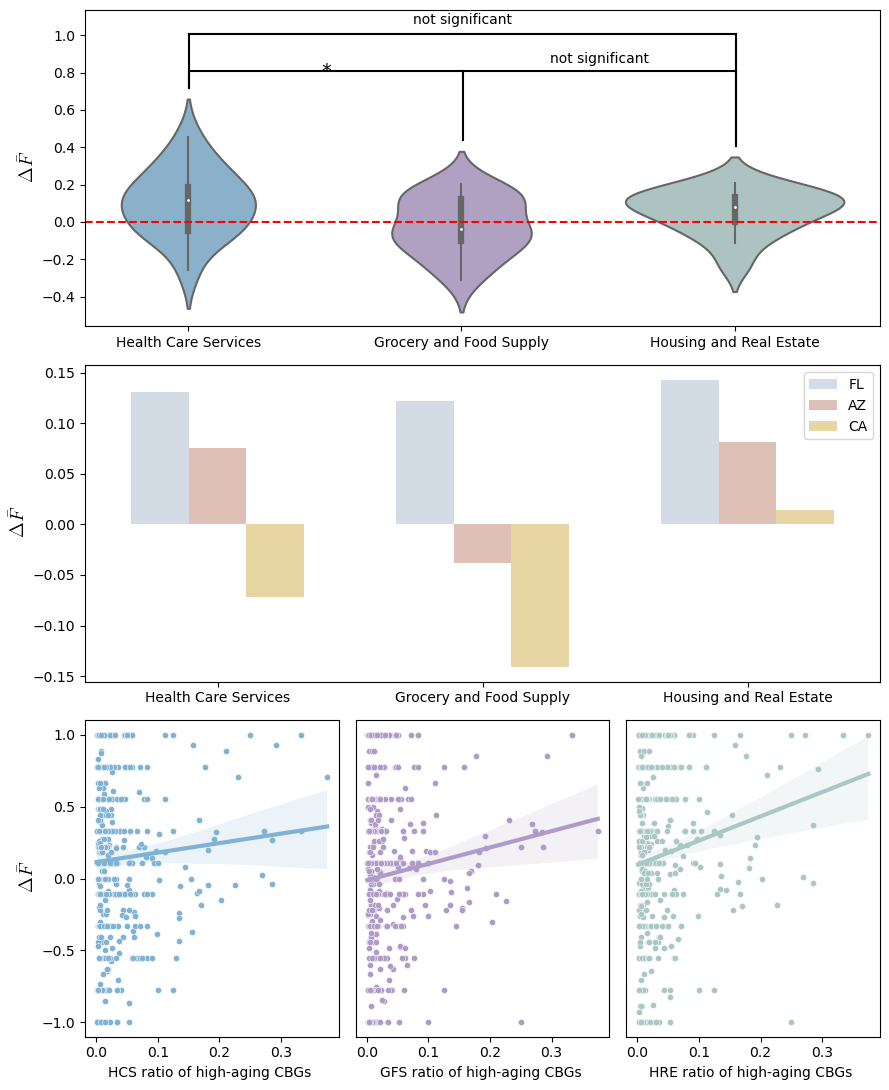

In [109]:
import matplotlib.gridspec as gridspec
import seaborn as sns
import statsmodels.api as sm

figg=plt.figure(figsize=(9,11))
fig=gridspec.GridSpec(3,3)

ax0=plt.subplot(fig[0,:3])
ax1=plt.subplot(fig[1,:3])


ax=[ax0,ax1]



mainPType=['Health Care Services',
                'Grocery and Food Supply',
                 'Housing and Real Estate']
type_color_dict={'Health Care Services':'#7FB2D5','Grocery and Food Supply':'#AF9BC9', 'Housing and Real Estate':'#A9C7C4'}

dfD=dfDD[(dfDD['numOldCBG']>=30)&(dfDD['parentType'].isin(mainPType))]
#fig, ax=plt.subplots(2,1,constrained_layout=True, figsize=(8, 8))#
loc_dict={}
HGHlist=['HCS','GFS','HRE']

hue='DistDiff'


s=sns.violinplot(x='parentType',y='FairIndex',data=dfD[(dfD['fairtype']=='DistDiff')],split=True,ax=ax[0],
                 palette=type_color_dict.values()) #,cut=-1
#s.set_xticklabels(labels=dfD[dfD['fairtype']==hue]['parentType'].unique(),rotation=45)
ax[0].axhline(0,color='red',linestyle='dashed')
s.set_xlabel('')
#s.set_title(hue)

for j, violin in enumerate(s.collections):
    if j%2==0:
        vertices = violin.get_paths()[0].vertices
        top_position_y = vertices[:, 1].max()
        top_position_x = vertices[0, 0]
        #print(top_position_x,top_position_y)
        #top_positions.append(top_position)
        loc_dict[HGHlist[j//2]+'_'+hue]=(top_position_x,top_position_y)
if hue=='Median':
    dic_pv=med_dict_pvalue
else:
    dic_pv=dd_dict_pvalue


x1=loc_dict['HCS_'+hue][0]

y1=max(loc_dict['HCS_'+hue][1],loc_dict['GFS_'+hue][1],loc_dict['HRE_'+hue][1])+0.15
x2=loc_dict['GFS_'+hue][0]
y2=y1

x3=loc_dict['HRE_'+hue][0]
y3=max(loc_dict['HCS_'+hue][1],loc_dict['GFS_'+hue][1],loc_dict['HRE_'+hue][1])+0.35

ax[0].plot([x1,x2],[y1,y2],color='black')
ax[0].plot([x3,x2],[y1,y1],color='black')

ax[0].plot([x3,x1],[y3,y3],color='black')

ax[0].plot([x1,x1],[loc_dict['HCS_'+hue][1]+0.06,y3],color='black')
ax[0].plot([x3,x3],[loc_dict['HRE_'+hue][1]+0.06,y3],color='black')    

ax[0].plot([x1,x1],[loc_dict['HCS_'+hue][1]+0.06,y1],color='black')
ax[0].plot([x2,x2],[loc_dict['GFS_'+hue][1]+0.06,y1],color='black')

ax[0].plot([x3,x3],[loc_dict['HRE_'+hue][1]+0.06,y1],color='black')


ax[0].text((x1+x2)/2,y1-0.03,dic_pv[('HCS', 'GFS')],ha='center',fontsize=14)
ax[0].text((x3+x2)/2,y1+0.045,dic_pv[( 'GFS','HRE')],ha='center',fontsize=10)

ax[0].text((x1+x3)/2,y3+0.05,dic_pv[('HCS', 'HRE')],ha='center',fontsize=10)

ax[0].plot([x3,x1],[y3+0.05,y3+0.05],color='white')
  
ax[0].set_ylabel(r'$\Delta \bar F$',usetex=True,fontsize=14)
#r'$\Delta \bar F$',usetex=True,

ax[0].tick_params(axis='both', which='both', bottom=True, left=True)  # 设置x y轴标签大小
#sub image2
mainPType=['Health Care Services',
                'Grocery and Food Supply',
                 'Housing and Real Estate']

#stateList=['US','FL','AZ','CA']
stateList=['FL','AZ','CA']
#state_color_dict={'US':'#98A3CA','FL':'#D0DCE8', 'AZ':'#E6BCB0','CA':'#F2DB96'}
state_color_dict={'FL':'#D0DCE8', 'AZ':'#E6BCB0','CA':'#F2DB96'}

color_dict={'Health Care Services':'#7FB2D5','Grocery and Food Supply':'#AF9BC9', 'Housing and Real Estate':'#A9C7C4'}

#dfD1=pd.concat([dfDD,homoDDFairDF_US])
dfD1=dfDD
dfD2=dfD1[(dfD1['numOldCBG']>=30)&(dfD1['parentType'].isin(mainPType))
          &(dfD1['fairtype']=='DistDiff')&(dfD1['state'].isin(stateList))]

dfD2['state']=pd.Categorical(dfD2['state'],categories=stateList,ordered=True)
dfD2= dfD2.sort_values(by='state')


sns.barplot(x='parentType',y='FairIndex',hue='state',palette=state_color_dict,data=dfD2,ax=ax[1],width=0.65)
ax[1].legend(title=None)
ax[1].set_xlabel('')
ax[1].set_ylabel(r'$\Delta \bar F$',usetex=True,fontsize=14)
ax[1].tick_params(axis='both', which='both', bottom=True, left=True)  # 设置x y轴标签大小

abb_dict={'Health Care Services':'HCS','Grocery and Food Supply':'GFS', 'Housing and Real Estate':'HRE'}
size_dict={0:20,10: 60 ,30: 180}

color_dict={'Health Care Services':'#7FB2D5','Grocery and Food Supply':'#AF9BC9', 'Housing and Real Estate':'#A9C7C4'}
mainPType=color_dict.keys()

for j, key in enumerate(mainPType): #key='Health Care Services'
    k=0
    ax2=plt.subplot(fig[2,j])
    
    dfD=df_homoFairCounty[(df_homoFairCounty['num_old_cbg']>k)&(df_homoFairCounty['parentType'].isin(mainPType))]
    s=sns.scatterplot(x='old_percent',y='FairIndex',data=dfD[(dfD['parentType']==key)&(dfD['old_percent']>=0.0)],ax=ax2,
                      color=color_dict[key],s=20,alpha=1)
    s=sns.regplot(data=dfD[(dfD['parentType']==key)&(dfD['old_percent']>=0.0)], x="old_percent", y='FairIndex',
                   scatter=False, ax=ax2,color=color_dict[key],line_kws={"linewidth": 3})
    
    #regression
    data=dfD[(dfD['parentType']==key)&(dfD['old_percent']>=0.0)]
    x = data['old_percent']
    y = data['FairIndex']
    x_with_constant = sm.add_constant(x)  # 添加常数项
    model = sm.OLS(y, x_with_constant)
    results = model.fit()
    slope = results.params[1]
    intercept = results.params[0]
    print(key,slope,intercept)


    #s.set_title(abb_dict[key])
    ax2.set_ylim(-1.1, 1.1)
    if j>0:
        ax2.set_ylabel('')
        ax2.set_yticks([])
    else:
        ax2.set_yticks([-1.0,-0.5,0,0.5,1])
        ax2.set_ylabel(r'$\Delta \bar F$',usetex=True,fontsize=14)
    #ax2.set_xticks([0.0,0.1,0.2])
    
    ax2.set_xlabel(abb_dict[key]+' ratio of high-aging CBGs ')
    ax2.tick_params(axis='both', which='both', bottom=True, left=True)  
    
figg.tight_layout()

In [110]:
prepath='D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/'
figg.savefig(prepath+'FairIndex/county_DD_fairindex_HGH_3states_with_oldpercent.jpg',dpi=600)  